Image Preprocessing
===

In which we introduce some preprocessing techniques for image data.

# k-Nearest Neighbors

kNN is a simple machine learning algorithm that depends on distances among data points for classification. The distances are usually measured using either Manhattan distance or Euclidean distance.

## The MNIST Dataset

We load the MNIST dataset using `cv2.imread()`.

In [1]:
import cv2
import numpy as np

In [4]:
# load the dataset
mnist = cv2.imread('./datasets/digits.png', 0)

In [5]:
mnist.shape

(1000, 2000)

In [7]:
# The mnist image that it has 2000 pixels (width) x 1000 pixels (height) resolution
# and it has 100 images per row and 50 images per column

# np.vsplit(mnist, 50) is the vertical split, i.e. it returns 50 equal rows
# np.hsplit(mnist, 100) is the horizontal split, i.e. it returns 100 equal columns
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [9]:
# We have dataset with 50 rows and 100 columns, each with 20x20-pixel image
features.shape

(50, 100, 20, 20)

In [11]:
# for visualization of data
import matplotlib.pyplot as plt

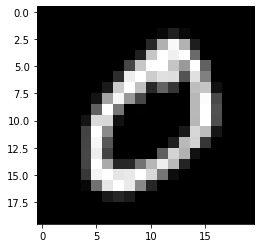

In [12]:
# we use features[0, 0] here as indices to denote that we are referring to
# image in features in first row, and first col
plt.imshow(features[0, 0], cmap='gray')
plt.show()

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [15]:
# split the dataset

# split first 50 images, from middle to left as training dataset
train_features = features[:, :50].reshape(-1, (20 * 20))

# split second 50 iamges, from middle to right as testing dataset
test_features = features[:, 50:100].reshape(-1, (20 * 20))

In [20]:
# create an array with [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
k = np.arange(10)
print(k)



# repeat it for 250 times since we have 2500 training images
# reshape it to have an array for each label which belongs to specific image
train_labels = np.repeat(k, 250).reshape(-1, 1)
print("--"*20)
print(train_labels)


# copy the same labels since we splitted the dataset equally to 2
test_labels = train_labels.copy()
print("--"*20)
print(test_labels)

[0 1 2 3 4 5 6 7 8 9]
----------------------------------------
[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]
----------------------------------------
[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


## Mean Normalization

This is the process of bringing the data to standard scale, specifically, to zero-mean the data. For this preprocessing, we are going to use NumPy.

The importance of bringing the data to zero mean is for the data to be at the same scale, i.e. zero-centered. Hence, there would be no bias towards any class of data.

To mean normalize the dataset, we should use the average of the training features for both training features and testing features.

In [21]:
# use the average of train_features only to avoid giving test dataset an information about the training data
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

## The kNN Model

Let's create the kNN model using `cv2.ml.KNearest_create()`.

In [22]:
model = cv2.ml.KNearest_create()

### Training the kNN

Model just memorizing the data points in training process.

In [23]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the trained kNN

Classify test features using trained kNN model.

In [24]:
# use k = 3, other values of k can be used
ret, result, neighbors, dist = model.findNearest(test_features, 3)

### Measure Model Accuracy

Get the test accuracy of the trained kNN model.

In [25]:
# check if the results are correct
matches = np.equal(result, test_labels)

# convert bool to int
matches = matches.astype(np.int)

# count the correct predictions
correct = np.count_nonzero(matches)

# compute the accuracy
accuracy = (correct * 100.00) / result.size

In [27]:
# display the test accuracy
print('Correct: {}'.format(correct))
print('Accuracy: {}'.format(accuracy))

Correct: 1981
Accuracy: 79.24


## The Fashion-MNIST Dataset

The Fashion-MNIST dataset was introduced as an alternative to MNIST. The Fashion-MNIST dataset we have has 30 images per row, and 30 images per column.

In [28]:
# load the dataset
fashion = cv2.imread('./datasets/fashion.png', 0)

In [29]:
fashion.shape

(840, 840)

With the `840x840` size of the dataset, and `30x30` images in the dataset, we have each image at `28x28` pixels.

In [30]:
features = np.array([np.hsplit(row, 30) for row in np.vsplit(fashion, 30)], dtype=np.float32)

In [31]:
features.shape

(30, 30, 28, 28)

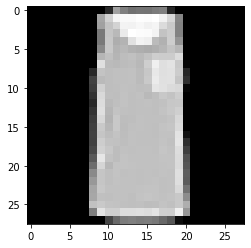

In [32]:
plt.imshow(features[0, 0], cmap='gray')
plt.show()

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [33]:
train_features = features[:, :15].reshape(-1, (28 * 28))
test_features = features[:, 15:30].reshape(-1, (28 * 28))

In [34]:
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

## Mean Normalization

In [35]:
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

## The kNN Model

Let's create the kNN model using `cv2.ml.KNearest_create()`.

In [36]:
model = cv2.ml.KNearest_create()

### Training the kNN

Model just memorizing the data points in training process.

In [37]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the trained kNN

Classify test features using trained kNN model.

In [38]:
# use k = 3, other values of k can be used
ret, result, neighbors, dist = model.findNearest(test_features, 3)

### Measure Model Accuracy

Get the test accuracy of the trained kNN model.

In [39]:
# check if the results are correct
matches = np.equal(result, test_labels)

# convert bool to int
matches = matches.astype(np.int)

# count the correct predictions
correct = np.count_nonzero(matches)

# compute the accuracy
accuracy = (correct * 100.00) / result.size

In [40]:
# display the test accuracy
print('Correct: {}'.format(correct))
print('Accuracy: {}'.format(accuracy))

Correct: 234
Accuracy: 52.0


# Support Vector Machine

Finds the hyperplane which best separates the dataset into  two classes.

## The MNIST Dataset

In [41]:
# load the dataset
mnist = cv2.imread('./datasets/digits.png', 0)

In [42]:
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [43]:
features.shape

(50, 100, 20, 20)

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [44]:
train_features = features[:, :50].reshape(-1, (20 * 20))
test_features = features[:, 50:100].reshape(-1, (20 * 20))

In [45]:
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

## Mean Normalization

In [46]:
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

## The SVM Model

In [47]:
model = cv2.ml.SVM_create()

In [48]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

### Training the SVM

In [49]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the Trained SVM

In [50]:
result = model.predict(test_features)

### Measure Model Accuracy

Get the test accuracy of the trained SVM model.

In [51]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [53]:
print('Correct: {}'.format(correct))
print('Accuracy : {}'.format(accuracy))

Correct: 1671
Accuracy : 66.84


## The Fashion-MNIST Dataset

The Fashion-MNIST dataset was introduced as an alternative to MNIST. The Fashion-MNIST dataset we have has 30 images per row, and 30 images per column.

In [54]:
# load the dataset
fashion = cv2.imread('./datasets/fashion.png', 0)

In [55]:
fashion.shape

(840, 840)

With the `840x840` size of the dataset, and `30x30` images in the dataset, we have each image at `28x28` pixels.

In [56]:
features = np.array([np.hsplit(row, 30) for row in np.vsplit(fashion, 30)], dtype=np.float32)

In [57]:
features.shape

(30, 30, 28, 28)

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [58]:
train_features = features[:, :15].reshape(-1, (28 * 28))
test_features = features[:, 15:30].reshape(-1, (28 * 28))

In [59]:
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

## Mean Normalization

In [60]:
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

## The SVM Model

In [61]:
model = cv2.ml.SVM_create()

In [62]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

### Training the SVM

In [63]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the Trained SVM

In [69]:
# result has two values,
# first is boolean if there are any predictions produced
# second is the actual predictions
result = model.predict(test_features)
print('Result: {}'.format(result))

Result: (0.0, array([[0.],
       [6.],
       [0.],
       [0.],
       [0.],
       [6.],
       [6.],
       [0.],
       [0.],
       [6.],
       [0.],
       [0.],
       [6.],
       [0.],
       [4.],
       [6.],
       [0.],
       [0.],
       [0.],
       [0.],
       [6.],
       [1.],
       [0.],
       [6.],
       [0.],
       [0.],
       [6.],
       [0.],
       [0.],
       [0.],
       [6.],
       [6.],
       [6.],
       [6.],
       [0.],
       [4.],
       [6.],
       [0.],
       [0.],
       [6.],
       [6.],
       [4.],
       [0.],
       [1.],
       [6.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.]

### Measure Model Accuracy

Get the test accuracy of the trained SVM model.

In [70]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [71]:
print('Correct: {}'.format(correct))
print('Accuracy : {}'.format(accuracy))

Correct: 254
Accuracy : 56.44444444444444


## Principal Component Analysis

This is getting the "principal components" that represents or summarizes the entire data.

In [72]:
from sklearn.decomposition import PCA

In [74]:
mnist = cv2.imread('./datasets/digits.png', 0)

In [75]:
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [76]:
features.shape

(50, 100, 20, 20)

In [77]:
features = features.reshape(-1, (20 * 20))

In [78]:
features.shape

(5000, 400)

In [79]:
pca = PCA(n_components=features.shape[1])

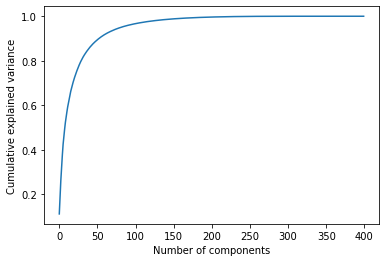

In [80]:
pca.fit(features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [81]:
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [82]:
pca = PCA(n_components=100)

In [83]:
train_features = features[:, :50].reshape(-1, (20 * 20))
test_features = features[:, 50:100].reshape(-1, (20 * 20))

In [84]:
pca.fit(train_features)

PCA(n_components=100)

In [85]:
train_features.shape

(2500, 400)

In [86]:
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

In [87]:
train_features.shape, test_features.shape

((2500, 100), (2500, 100))

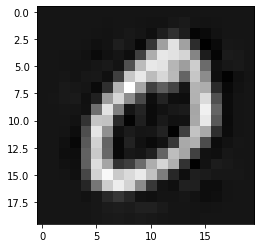

In [88]:
inverse_pca = pca.inverse_transform(train_features)
inverse_pca.shape
plt.imshow(inverse_pca[0].reshape(20, 20), cmap='gray')

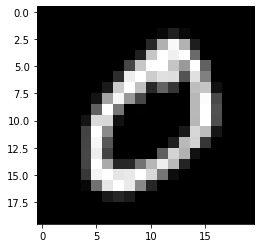

In [89]:
plt.imshow(features[0, 0], cmap='gray')
plt.show()

## Exercises

* Use PCA-transformed features as training and testing data for kNN and SVM on MNIST and Fashion-MNIST.
* Use Mean Normalization + PCA for training and testing data for kNN and SVM on MNIST and Fashion-MNIST.